<h1 style="padding-top: 25px;padding-bottom: 25px;text-align: left; padding-left: 10px; background-color: #DDDDDD; 
    color: black;"> <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> S-109A Introduction to Data Science </h1>

## Homework 1: Data Collection - Web Scraping - Data Parsing

**Harvard University**<br/>
**Summer 2020**<br/>
**Instructor**: Kevin Rader



<hr style='height:2px'>

In [71]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

<div class='exercise'><b>Instructions</b></div>
- To submit your assignment follow the instructions given in Canvas.
- The deliverables to be submitted in Canvas are: <br/>
    a) this python notebook with your code and answers<br/>
    b) the bibtex file, `publist.bib`, you created<br/>
    c) the CSV file, `publist.csv`, you created <br/>
    d) The JSON file, `publist.json` you created<br/>
    
- Exercise **responsible scraping**. Web servers can become slow or unresponsive if they receive too many requests from the same source in a short amount of time. Use a delay of several seconds between requests in your code. This helps to prevent you from getting blocked by the target website. Run the webpage fetching part of the homework only once and do not re-run after you have saved the results in the JSON file (details below). 
- Web scraping requests can take several minutes. This is another reason why you should not wait until the last minute to do this homework.



# Data Collection - Web Scraping - Data Parsing 
 

In this homework, your goal is to learn how to acquire, parse, clean, and analyze data. Initially you will read the data from a file, and then later scrape them directly from a website. You will look for specific pieces of information by parsing the data, clean the data to prepare them for analysis, and finally, answer some questions.

In doing so you will get more familiar with three of the common file formats for storing and transferring data, which are:
- CSV, a text-based file format used for storing tabular data that are separated by some delimiter, usually comma or space.
- HTML/XML.
- JavaScript Object Notation (JSON), a text-based open standard designed for transmitting structured data over the web.

In [72]:
# import the necessary libraries
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
%matplotlib inline

## Help a professor parse their publications and extract information.

### Overview

In this part your goal is to parse the HTML page of a professor containing some of his/her publications, and answer some questions. This page is provided to you in the file `data/publist_super_clean.html`. There are 45 publications in descending order from No. 244 to No. 200.


In [73]:
# use this file 
PUB_FILEPATH = 'data/publist_super_clean.html'

<div class='exercise'><b> Question 1 [40 pts]: Parsing and Converting to bibTex and CSV using Beautiful Soup and python string manipulation </b></div>

A lot of the bibliographic and publication information is displayed in various websites in a not-so-structured HTML files. Some publishers prefer to store and transmit this information in a .bibTex file which looks roughly like this (we've simplified a few things):
```
@article { 
     author = "John Doyle",
     title = "Interaction between atoms",
     URL = "Papers/PhysRevB_81_085406_2010.pdf",
     journal = "Phys. Rev. B",
     volume = "81"
}
```
You will notice that this file format is a set of items, each of which is a set of key-value pairs. In the python world, you can think of this as a list of dictionaries.
Each line is an item, and has multiple features, or keys, as represented by that line's value for the column corresponding to the key.

You are given an .html file containing a list of papers scraped from the author's website and you are to write the information into .bibTex and .CSV formats. A useful tool for parsing HTML is BeautifulSoup  (http://www.crummy.com/software/BeautifulSoup/) (BS).

**1.1 [5 pts]** Write a function called `make_soup` that accepts `filename` for the HTML filename as an input and returns a BS object.
    
**1.2 [25 pts]** Write a function that reads in the BS object, parses it, and converts it into a list of dictionaries.  Each element of this list should cerrespond to one paper and should have the following format (with different values for each publication):
```
{'author': 'L.A. Agapito, N. Kioussis and E. Kaxiras',
 'title': 'Electric-field control of magnetism in graphene quantum dots:\n Ab initio calculations',
 'URL': 'Papers/PhysRevB_82_201411_2010.pdf',
 'journal': 'Phys. Rev. B',
 'volume': '82'}
```


**1.3 [5 pts]** Convert the list of dictionaries into standard .bibTex format using python string manipulation, and write the results into a file called `publist.bib`.

**1.4 [5 pts]** Convert the list of dictionaries into standard tabular .csv format using pandas, and write the results into a file called `publist.csv`. The csv file should have a header and no integer index.

    
#### HINT 
- Inspect the HTML code for tags that indicate information chunks such as `title` of the paper.  BeautifulSoup's `find_all` method might be useful.
- Question 1.2 is better handled if you break the code into functions, each performing a small task such as finding the author(s) for each paper. 
- Question 1.3 is effectively tackled by first using python string formatting on a template string.
- Make sure you catch exceptions when needed. 
- Make sure you check for **missing data** and handle these cases as you see fit. 


#### Resources
- [BeautifulSoup Tutorial](https://www.dataquest.io/blog/web-scraping-tutorial-python/).
- More about the [BibTex format](http://www.bibtex.org).<BR>
    
### Answers 

In [74]:
# import the necessary libraries 
from bs4 import BeautifulSoup
from bs4.element import Tag
from string import Template
from typing import List

 **1.1 [5 pts]  Write a function called `make_soup` that accepts as input a string representing the path to an HTML file and returns a BS object.**
    

In [75]:
def make_soup(file_path: str) -> BeautifulSoup: 
    '''Open the file and convert into a BS object. 
       
       Args:
           file_path: (str) path to an HTML file
       
       Returns:
           A BS object containing the HTML page ready to be parsed.
    '''
    with open(file=file_path, mode="r", encoding="utf-8") as fp:
        contents = BeautifulSoup(fp.read(), 'html.parser')
    return contents

In [76]:
# check your code - print the BS object returned by `make_soup()`
# you should get a familiar HTML page as text (please enable scrolling on the output)
soup = make_soup(PUB_FILEPATH)
print(soup)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<title>Kaxiras E journal publications</title>
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
<meta content="" name="description"/>
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head>
<body>
<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li>
</ol>
<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efth

Your output should look **like** this:
```
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<title>Kaxiras E journal publications</title>
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
<meta content="" name="description"/>
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head>
<body>
<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li>
</ol>
<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  035325 (2011)
<br/>
</li>
</ol>

...

```

**1.2 [25 pts] Write a function that reads in the BS object, parses it, and converts it into a list of dictionaries.  Each element of this list should correspond to one paper and should have the following format (with different values for each publication):**
```
{'author': 'L.A. Agapito, N. Kioussis and E. Kaxiras',
 'title': 'Electric-field control of magnetism in graphene quantum dots:\n Ab initio calculations',
 'URL': 'Papers/PhysRevB_82_201411_2010.pdf',
 'journal': 'Phys. Rev. B',
 'volume': '82'}
```

In [77]:
# your code here 
def get_author(tag: Tag) -> str:
    """ Given a tag, return the author on page otherwise empty string """
    return tag.find("br").next_sibling.strip() if tag.find("br") else ""

def get_title(tag: Tag) -> str:
    """ Given a tag, return the title on page otherwise empty string """
    return tag.find("a").contents[0].strip().strip("\"") if tag.find("a") else ""

def get_title(tag: Tag) -> str:
    """ Given a tag, return the title on page otherwise empty string """
    return tag.find("a").contents[0].strip().strip("\"") if tag.find("a") else ""

def get_url(tag: Tag) -> str:
    """ Given a tag, return the url on page otherwise empty string """
    return tag.find("a")['href'].strip() if tag.find("a")['href'] else ""

def get_journal(tag: Tag) -> str:
    """ Given a tag, return the journal on page otherwise empty string """
    return tag.find("i").contents[0].strip() if tag.find("i") else ""

def get_volume(tag: Tag) -> str:
    """ Given a tag, return the title on page otherwise empty string """
    return tag.find("b").contents[0].strip() if tag.find("b") else ""

def purify_text(text: str) -> str:
    """ Clean up text i.e. remove newline, return and tab characters """
    text = text.strip().rstrip(",")
    text = text.replace('\n',' ')
    text = text.replace('\t','')
    return text

Using functions above to convert the soup object into a list of dictionaries

In [78]:
# your code here
def parse_article_tag(tag: Tag) -> dict:
    """ Parse an article soup tag and return a dict """
    return {
        "author": purify_text(get_author(tag)), 
        "title": purify_text(get_title(tag)), 
        "URL": purify_text(get_url(tag)),
        "journal": purify_text(get_journal(tag)),
        "volume": purify_text(get_volume(tag))
    }

def process_articles(soup: BeautifulSoup) -> List[dict]:
    """ Process articles from a BeautifulSoup object. Returns a list of dictionaries """
    return list(map(parse_article_tag, soup.find_all("li")))

In [79]:
articles_list = process_articles(soup)
articles_list[:5]

[{'author': 'Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng',
  'title': 'Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons',
  'URL': 'Papers/2011/PhysRevB_84_125411_2011.pdf',
  'journal': 'PHYSICAL REVIEW B',
  'volume': '84'},
 {'author': 'JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng',
  'title': 'Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles',
  'URL': 'Papers/2011/PhysRevB_84_035325_2011.pdf',
  'journal': 'PHYSICAL REVIEW B',
  'volume': '84'},
 {'author': 'Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras',
  'title': 'Influence of CH2 content and network defects on the elastic properties of organosilicate glasses',
  'URL': 'Papers/2011/PhysRevB_83_054204_2011.pdf',
  'journal': 'PHYSICAL REVIEW B',
  'volume': '83'},
 {'author': 'Martin Heiss, Sonia Conesa-Boj, Jun Ren, Hsiang-Han Tseng, Adam Gali',
  'title': 'Direct correlat

**1.3** [5 pts] Convert the list of dictionaries into standard .bibTex format using python string manipulation, and write the results into a file called `publist.bib`.

__For reference__
```
@article { 
     author = "John Doyle",
     title = "Interaction between atoms",
     URL = "Papers/PhysRevB_81_085406_2010.pdf",
     journal = "Phys. Rev. B",
     volume = "81"
}


@article { 
     author = "John Doyle",
     title = "Interaction between atoms and another protron",
     URL = "Papers/PhysRevB_81_085406_2011.pdf",
     journal = "Phys. Rev. B",
     volume = "82"
}

```

In [80]:
# Using Python string Templates
def generate_article(author: str, 
                            title: str, 
                            url: str, 
                            journal: str, 
                            volume: str) -> str:
    """ Create a template for bibTex format """
    template = """ 
    @article { 
        author = "$author", 
        title = "$title", 
        URL = "$url", 
        journal = "$journal", 
        volume = "$volume" 
    }\n""" 
    article_template = Template(template)
    return article_template.substitute(author=author, title=title, url=url, journal=journal, volume=volume)

In [87]:
# your code here
ARTICLES_BIB_PATH = "./data/publist.bib"
def write_articles_bib_to_disk(articles: list, bib_out_path: str = ARTICLES_PUB_PATH) -> None:
    """ Take a list of dictionaries and write to bibTex file """
    assert articles, "[ERROR] - Articles are required!"
    
    articles_bibs = [generate_article(article['author'], article['title'], article['URL'], article['journal'], article['volume'])
               for article in articles_list]
    with open(bib_out_path, "w") as fp:
        fp.writelines(articles_bibs)
    print(f"Done writing {len(articles_bibs)} articles to bibTex")

In [88]:
# Write bibTex file
write_articles_bib_to_disk(articles=articles_list)

Done writing 45 articles to bibTex


In [89]:
# check your answer - print the bibTex file
# clear/remove output before making pdf
with open(ARTICLES_BIB_PATH, 'r') as f:
    print(f.read())

 
    @article { 
        author = "Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng", 
        title = "Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons", 
        URL = "Papers/2011/PhysRevB_84_125411_2011.pdf", 
        journal = "PHYSICAL REVIEW B", 
        volume = "84" 
    }
 
    @article { 
        author = "JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng", 
        title = "Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles", 
        URL = "Papers/2011/PhysRevB_84_035325_2011.pdf", 
        journal = "PHYSICAL REVIEW B", 
        volume = "84" 
    }
 
    @article { 
        author = "Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras", 
        title = "Influence of CH2 content and network defects on the elastic properties of organosilicate glasses", 
        URL = "Papers/2011/PhysRevB_83_054204_2011.pdf", 
        journal = "PHYSI

**1.4** [5 pts] Convert the list of dictionaries into standard tabular .csv format using pandas, and write the results into a file called `publist.csv`. The csv file should have a header and no integer index.

In [95]:
# your code here
ARTICLES_CSV_PATH = "./data/publist.csv"
df = pd.DataFrame(articles_list)

In [96]:
# writing to CSV file
df.to_csv(path_or_buf=ARTICLES_CSV_PATH, header=True, index=False)

## Follow the stars in IMDb's list of "The Top 100 Stars for 2018" 

### Overview
In this part, your goal is to extract information from IMDb's Top 100 Stars for 2018 (https://www.imdb.com/list/ls045252306/) and perform some analysis on each star in the list. In particular we are interested to know: 
+ how many performers made their first movie at 17? 
+ how many performers started as child actors? (i.e., younger than 12)
+ who is the most proliferate actress or actor in IMDb's list of the Top 100 Stars for 2018? 

These questions are addressed in more details in the questions below. 



<div class='exercise'><b> Question 2 [60 pts]: Web Scraping using Beautiful Soup and exploring using Pandas </b></div>

**2.1 [5 pts]** Download the webpage of the "Top 100 Stars for 2018" (https://www.imdb.com/list/ls045252306/) into a `requests` object and name it `my_page`. Explain what the following attributes are (1 or 2 sentences for each):

- `my_page.text`, 
- `my_page.status_code`,
- `my_page.content`.

**2.2 [5 pts]** Create a Beautiful Soup object named `star_soup` using `my_page` as input.

**2.3 [15 pts]** Write a function called `parse_stars` that accepts `star_soup` as its input and generates a list of dictionaries named `starlist` (see definition below). The order of dictionaries does not matter. One of the fields of this dictionary is the `url` of each star's individual page, which you need to save in the `page` field. Note that there is a ton of information about each star on these webpages. Each dictionary corresponds to a star profile and it should have the following data:

```
name: the name of the actor/actress as it appears at the top
gender: 0 or 1: translate the word 'actress' into 1 and 'actor' into '0'
url: the url of the link under their name that leads to a page with details
page: BS object with html text acquired by scraping the above 'url' page' 
```


**2.4 [15 pts]** Write a function called `create_star_table`, which takes `starlist` as an input and extracts information about each star (see function definition for the exact information to be extracted and the exact output definition).  Only extract information from the first box on each star's page. If the first box is acting, consider only acting credits and the star's acting debut, if the first box is Directing, consider only directing credits and directorial debut.

   
**2.6 [6 pts]** We provide a JSON file called `data/staff_starinfo.json` created by CS109 teaching staff for consistency, which you should use for the rest of the homework. Import the contents of this JSON file  into a pandas dataframe called `frame`. Check the types of variables in each column and clean these variables if needed. Add a new column to your dataframe with the age of each actor when they made their first appearance, movie or TV, (name this column `age_at_first_movie`). Check some of the values of this new column. Do you find any problems? You don't need to fix them.

**2.7 [4 pts]** You are now ready to answer the following intriguing questions: 
- **2.7.1** How many performers made their first appearance (movie or TV) when he/she was 17 years old?

- **2.7.2** How many performers started as child actors? Define child actor as a person younger than 12 years old. 

**2.8 [6 pts]** Use your Python visualization skills to further explore the data:
- **2.8.1** Create 2 scatter plots: one showing the relationship between age at first movie and number of credits, the other between year born and number of credits. What can you say about these relationships? Are there any apparent outliers? Please limit your written responses to 4 sentences or fewer.
- **2.8.2** Create 2 histograms in a single plot comparing the distribution of actors' current ages to actresses' current ages. What does this visualization tell you? (4 sentences or fewer)
- **2.8.3** Create a box plot comparing the credits-per-year-active for actors and actresses. Here we assume all stars in the list are still active. Do these distributions look the same across genders? Comment on anything else of interest gleaned from your plot. (4 sentences or fewer)

**2.9 [2 pts]** Make a plot of the number of credits against the name of actor/actress. Who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2018? Define **most prolific** as the performer with the most credits.
    
**2.10 [2 pts]** In 4 or fewer sentences, comment on what you see in the plots above.  Are there any surprises or patterns?  Please **have some fun** with this question.
     
### Hints
- Create a variable that groups actors/actresses by the age of their first movie. Use pandas' `.groupby` to divide the dataframe into groups of performers that for example started performing as children (age $<$ 12). The grouped variable is a `GroupBy` pandas object and this object has all of the information needed to then apply operations to each of the groups.
- When cleaning the data make sure the variables with which you are performing calculations are in numerical format.
- The column with the year has some values that are double, e.g. **'2000-2001'** and the column with age has some empty cells. You need to deal with these in a reasonable fashion before performing calculations on the data. 
- You should include both movies and TV shows.
    
### Resources
- The `requests` library makes working with HTTP requests easy. For more on the `requests` library see http://docs.python-requests.org/

### Answers

In [98]:
import requests
import re # you may use regexes but they are not required

from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

**2.1** [5 pts] Download the webpage of the "Top 100 Stars for 2018" (https://www.imdb.com/list/ls045252306/) into a `requests` object and name it `my_page`. Explain what the following attributes are:

- `my_page.text`, 
- `my_page.status_code`,
- `my_page.content`.


In [100]:
# your code here
IMDB_2018_TOP_100_URL = "https://www.imdb.com/list/ls045252306/"

# To avoid network throttling and responsible scraping, I am leverage the below code
# Source - https://www.peterbe.com/plog/best-practice-with-retries-with-requests
def requests_retry_session(
    retries=3,
    backoff_factor=0.3,
    status_forcelist=(500, 502, 504),
    session=None,
):
    session = session or requests.Session()
    retry = Retry(
        total=retries,
        read=retries,
        connect=retries,
        backoff_factor=backoff_factor,
        status_forcelist=status_forcelist,
    )
    adapter = HTTPAdapter(max_retries=retry)
    session.mount('http://', adapter)
    session.mount('https://', adapter)
    return session

my_page = requests_retry_session().get(IMDB_2018_TOP_100_URL)

*your answer here*
[Source](https://www.geeksforgeeks.org/response-content-python-requests/?ref=rp)

-  __my_page.text__: This returned the **UNICODE** content of the response fetched from the 2018 top stars URI when  `requests.get`was used. 


-  __my_page.status_code__: This returned a number that indicates the status of the server that handled our request call. For this request, we received a 200 which meant the request was OK. However we could have gotten a 404 which would mean that the requested resource was not found.  


-  __my_page.content__: This returned the **BYTES** content of the response fetched from the 2018 top stars URI when `requests.get` was used.



**2.2** [5 pts] Create a Beautiful Soup object named `star_soup` using `my_page` as input.


In [108]:
# your code here
def make_top_100_imdb_star_soup(response) -> BeautifulSoup: 
    """
    Take a response content and convert into a BS object. 
       
       Args:
           response: (response)  HTTP response object of an HTML page
       
       Returns:
           A BS object containing the HTML page ready to be parsed.
    """
    return BeautifulSoup(response.content, 'html.parser')

In [109]:
# check your code - you should see familiar HTML code
star_soup = make_top_100_imdb_star_soup(my_page)
print (star_soup.prettify()[:])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///list/ls045252306?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Top 100 Stars of 2018 - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {w

**2.3 [15 pts] Write a function called `parse_stars` that accepts `star_soup` as its input and generates a list of dictionaries named `starlist` (see definition below)....**

```
Function
--------
parse_stars

Input
------
star_soup: the soup object with the scraped page
   
Returns
-------
a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    name: the name of the actor/actress as it appears at the top
    gender: 0 or 1: translate the word 'actress' into 1 and 'actor' into '0'
    url: the url of the link under their name that leads to a page with details
    page: BS object with 'html text acquired by scraping the above 'url' page' 

Example:
--------
{'name': Tom Hardy,
  'gender': 0,
  'url': https://www.imdb.com/name/nm0362766/?ref_=nmls_hd,
  'page': BS object with 'html text acquired by scraping the 'url' page'
}

```

In [132]:
# your code here 
def get_artist_name(tag: Tag) -> str:
    """ Get artist name """
    return tag.find("h3").find("a").contents[0].strip() if tag.find("h3").find("a") else ""

def get_artist_url(tag: Tag) -> str:
    """ Get artist url """
    BASE_URL = "https://www.imdb.com"
    URL_SUFFIX = "?ref_=nmls_hd"
    return BASE_URL + tag.find("a").attrs["href"] + URL_SUFFIX

def fetch_artist_page(url: str):
    """ Fetch artist page """
    return make_top_100_imdb_star_soup(requests_retry_session().get(url))

def get_artist_role(tag: Tag) -> str:
    """ Get artist role if possible """
    return (
        tag.find("p", attrs={"class": "text-muted text-small"}).contents[0].strip()
        if tag.find("p", attrs={"class": "text-muted text-small"})
        else ""
    )

def get_artist_job_categories(artist_page) -> list:
    """ Get all artists possible categories """
    return [
        i.find("span").contents[0].strip()
        for i in artist_page.find("div", {"id": "name-job-categories"}).find_all("a")
        if "Actor" in i.find("span").contents[0]
    ]

def get_artist_gender(tag: Tag, artist_page) -> int:
    """ Returns the artist gender as int """
    role = get_artist_role(tag)
    if role in ("Actress", "Actor"):
        return 1 if role == "Actress" else 0
    # Handle things like Soundtrack, and producer that has no Actress/Actor in first box
    else:
        job_categories = get_artist_job_categories(artist_page)
        return 0 if "Actor" in job_categories else 1
    

def parse_artist_tag(tag: Tag) -> dict:
    """ Parse an artist soup tag and return a dict """
    name = purify_text(get_artist_name(tag))
    url = purify_text(get_artist_url(tag))
    page = fetch_artist_page(url)
    gender = get_artist_gender(tag, page)
    
    return {
        "name": name,
        "gender": gender,
        "url": url,
        "page": page
    }

def parse_stars(artist_soup : BeautifulSoup) -> list:
    """ Accepts a star_soup as its input and generates a list of dictionaries named starlist"""
    all_stars = artist_soup.find_all('div',attrs = {'class': 'lister-item mode-detail'})
    return list(map(parse_artist_tag, all_stars))

In [205]:
starlist = parse_stars(star_soup)

This should give you 100

In [206]:
len(starlist)

100

In [207]:
# check your code
# this list is large because of the html in the `page` field
# to get a better picture, print only the first element
starlist[0]

{'name': 'Karen Gillan',
 'gender': 1,
 'url': 'https://www.imdb.com/name/nm2394794/?ref_=nmls_hd',
 'page': 
 <!DOCTYPE html>
 
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="app-id=342792525, app-argument=imdb:///name/nm2394794?src=mdot" name="apple-itunes-app"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <title>Karen Gillan - IMDb</title>
 <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <script>
     if (typeof uet == 'function') {
       uet("be", "LoadTitle", {wb: 1});
     }
 </script>
 <scr

Your output should look like this:
```
{'name': 'Karen Gillan',
 'gender': 1,
 'url': 'https://www.imdb.com/name/nm2394794',
 'page': 
 <!DOCTYPE html>
 
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="app-id=342792525, app-argument=imdb:///name/nm2394794?src=mdot" name="apple-itunes-app"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <title>Karen Gillan - IMDb</title>
 <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script> 
... 


 ```

**2.4** [15 pts] Write a function called `create_star_table`, which takes `starlist` as an input and extracts information about each star (see function definition for the exact information to be extracted and the exact output definition).  Only extract information from the first box on each star's page. If the first box is acting, consider only acting credits and the star's acting debut, if the first box is Directing, consider only directing credits and directorial debut.

```
Function
--------
create_star_table

Input
------
the starlist
   
Returns
-------

a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    star_name: the name of the actor/actress as it appears at the top
    gender: 0 or 1 (1 for 'actress' and 0 for 'actor')  
    year_born : year they were born
    first_movie: title of their first movie or TV show
    year_first_movie: the year they made their first movie or TV show
    credits: number of movies or TV shows they have made in their career.
    
--------
Example:

{'star_name': Tom Hardy,
  'gender': 0,
  'year_born': 1997,
  'first_movie' : 'Batman',
  'year_first_movie' : 2017,
  'credits' : 24}
  
```

In [211]:
# your code here
def get_artist_year_born(page) -> int:
    """ Returns the year an artist is born """
    return int(page.find("time")["datetime"].split("-")[0]) if page.find("time") else 1900

def get_all_artist_movies(page) -> list:
    """ Returns a list of soups for artist movies """
    return [text for text in page.find("div", {"class": "filmo-category-section"}).children if text != "\n"]

def get_artist_first_movie_info(page) -> str:
    """ Returns artist first movie and year first movie was made """
    artist_movies = get_all_artist_movies(page)
    first_movie = artist_movies[-1].find("span", {"class": "year_column"}).next_sibling.next_sibling.contents[0].text.strip()
    year_first_movie = int(artist_movies[-1].find("span", {"class": "year_column"}).contents[0].lstrip("\n\xa0").rstrip("\n")[:4])
    return (purify_text(first_movie), year_first_movie)

def get_artist_credits(page) -> str:
    """ Returns the artist credits """
    all_artist_credits = [i for i in page.find("div", {"id": f"filmography"}).children if i != "\n"]
    return all_artist_credits[0].find("a").next_sibling.strip().lstrip("(").rstrip(")").replace(" credits", "")

def parse_single_star(star: dict) -> dict:
    """ Takes a star dictionary from above stage and augments the data further """
    page = star["page"]
    name = star["name"]
    gender = star["gender"]
    year_born = get_artist_year_born(page)
    first_movie, year_first_movie = get_artist_first_movie_info(page)
    credits = get_artist_credits(page)
    return {
        "name": name,
        "gender": gender,
        "year_born": year_born,
        "first_movie": first_movie,
        "year_first_movie": year_first_movie,
        "credits": credits
    }

def create_star_table(star_list: list)-> list:
    """ Create a star table using stars_list as input """
    assert star_list, "[ERROR] - Star List is required!"
    return list(map(parse_single_star, star_list))

In [212]:
# DO NOT RERUN THE HTTP REQUESTS TO IMDb WHEN SUBMITTING - THIS WILL TAKE SOME TIME
star_table = create_star_table(starlist)

In [213]:
# check your code
star_table

[{'name': 'Karen Gillan',
  'gender': 1,
  'year_born': 1987,
  'first_movie': 'Rebus',
  'year_first_movie': 2006,
  'credits': '63'},
 {'name': 'Bryce Dallas Howard',
  'gender': 1,
  'year_born': 1981,
  'first_movie': 'Parenthood',
  'year_first_movie': 1989,
  'credits': '38'},
 {'name': 'Alicia Vikander',
  'gender': 1,
  'year_born': 1988,
  'first_movie': 'Min balsamerade mor',
  'year_first_movie': 2002,
  'credits': '45'},
 {'name': 'Tom Hardy',
  'gender': 0,
  'year_born': 1977,
  'first_movie': 'Tommaso',
  'year_first_movie': 2001,
  'credits': '56'},
 {'name': 'Rebecca Ferguson',
  'gender': 1,
  'year_born': 1983,
  'first_movie': 'Nya tider',
  'year_first_movie': 1999,
  'credits': '32'},
 {'name': 'Lily James',
  'gender': 1,
  'year_born': 1989,
  'first_movie': 'Just William',
  'year_first_movie': 2010,
  'credits': '31'},
 {'name': 'Jessica Barden',
  'gender': 1,
  'year_born': 1992,
  'first_movie': 'My Parents Are Aliens',
  'year_first_movie': 1999,
  'credit

Your output should look like this (the order of elements is not important):
```
[{'name': 'Karen Gillan',
  'gender': 1,
  'year_born': '1987',
  'first_movie': 'Rebus',
  'year_first_movie': '2006',
  'credits': '63'},
 {'name': 'Bryce Dallas Howard',
  'gender': 1,
  'year_born': '1981',
  'first_movie': 'Parenthood',
  'year_first_movie': '1989',
  'credits': '38'},  
    ...
```

**2.5**[4 pts] Now that you have scraped all the info you need, it's good practice to save the last data structure you created to disk. Save the data structure to a JSON file named `starinfo.json` and submit this JSON file in Canvas. If you do this, if you have to restart, you won't need to redo all the requests and parsings from before.


In [214]:
import json # investivate the `dump` method

In [215]:
# your code here
# your code here
ARTIST_TABLE_DUMP_PATH = "./data/starinfo.json"
with open(ARTIST_TABLE_DUMP_PATH, "w") as f:
  json.dump(star_table, f, ensure_ascii=False, indent=4)

To check your JSON saving, re-open the JSON file and reload the code

In [216]:
with open("./data/starinfo.json", "r") as fd:
    star_table = json.load(fd)
    
# output should be the same
star_table

[{'name': 'Karen Gillan',
  'gender': 1,
  'year_born': 1987,
  'first_movie': 'Rebus',
  'year_first_movie': 2006,
  'credits': '63'},
 {'name': 'Bryce Dallas Howard',
  'gender': 1,
  'year_born': 1981,
  'first_movie': 'Parenthood',
  'year_first_movie': 1989,
  'credits': '38'},
 {'name': 'Alicia Vikander',
  'gender': 1,
  'year_born': 1988,
  'first_movie': 'Min balsamerade mor',
  'year_first_movie': 2002,
  'credits': '45'},
 {'name': 'Tom Hardy',
  'gender': 0,
  'year_born': 1977,
  'first_movie': 'Tommaso',
  'year_first_movie': 2001,
  'credits': '56'},
 {'name': 'Rebecca Ferguson',
  'gender': 1,
  'year_born': 1983,
  'first_movie': 'Nya tider',
  'year_first_movie': 1999,
  'credits': '32'},
 {'name': 'Lily James',
  'gender': 1,
  'year_born': 1989,
  'first_movie': 'Just William',
  'year_first_movie': 2010,
  'credits': '31'},
 {'name': 'Jessica Barden',
  'gender': 1,
  'year_born': 1992,
  'first_movie': 'My Parents Are Aliens',
  'year_first_movie': 1999,
  'credit

**2.6** [6 pts] We provide a JSON file called `data/staff_starinfo.json` created by CS109 teaching staff for consistency, which you should use for the rest of the homework. Import the contents of this JSON file  into a pandas dataframe called `frame`. Check the types of variables in each column and clean these variables if needed. Add a new column to your dataframe with the age of each actor when they made their first appearance, movie or TV, (name this column `age_at_first_movie`). Check some of the values of this new column. Do you find any problems? You don't need to fix them.

In [218]:
# your code here
STAR_INFO_PATH = "./data/staff_starinfo_2018.json"
frame = pd.read_json(STAR_INFO_PATH, orient="records")

In [219]:
# Inspecting dataframe types
frame.dtypes

name                object
gender               int64
year_born            int64
first_movie         object
year_first_movie     int64
credits              int64
dtype: object

In [220]:
# Adding new column for age_at_first_movie
frame["age_at_first_movie"] = frame["year_first_movie"] - frame["year_born"]

In [266]:
# Inspect new columns 
frame.head()

,name,gender,year_born,first_movie,year_first_movie,credits,age_at_first_movie,age_current,credits_per_year_active
0,Karen Gillan,1,1987,Rebus,2006,63,19,33,4.500000
1,Bryce Dallas Howard,1,1981,Parenthood,1989,38,8,39,1.225806
2,Alicia Vikander,1,1988,Min balsamerade mor,2002,45,14,32,2.500000
3,Tom Hardy,0,1977,Tommaso,2001,56,24,43,2.947368
4,Rebecca Ferguson,1,1983,Nya tider,1999,32,16,37,1.523810


In [222]:
frame.describe()

,gender,year_born,year_first_movie,credits,age_at_first_movie
count,100.000000,100.000000,100.00000,100.000000,100.000000
mean,0.710000,1983.540000,2001.14000,47.040000,17.600000
std,0.456048,10.478858,9.17949,31.625306,6.592006
min,0.000000,1936.000000,1958.00000,5.000000,5.000000
25%,0.000000,1979.000000,1995.75000,29.750000,13.000000
50%,1.000000,1984.000000,2002.50000,41.000000,18.000000
75%,1.000000,1990.000000,2008.00000,57.250000,22.000000
max,1.000000,2002.000000,2016.00000,241.000000,49.000000


In [267]:
frame.nlargest(10,'credits')

,name,gender,year_born,first_movie,year_first_movie,credits,age_at_first_movie,age_current,credits_per_year_active
57,Lady Gaga,0,1986,Quelli che... il calcio,1993,241,7,34,8.925926
50,Burt Reynolds,0,1936,Flight,1958,184,22,84,2.967742
97,Sam Rockwell,0,1968,Joan Crawford's Children,1979,105,11,52,2.560976
83,Gary Oldman,0,1958,Remembrance,1982,103,24,62,2.710526
29,Parker Posey,1,1968,"First Love, Fatal Love",1991,101,23,52,3.482759
12,Carla Gugino,1,1971,Who's the Boss?,1988,99,17,49,3.093750
88,Ryan Reynolds,0,1976,Fifteen,1991,85,15,44,2.931034
81,Cate Blanchett,1,1969,Kaboria,1990,82,21,51,2.733333
80,Joel Edgerton,0,1974,Police Rescue,1995,77,21,46,3.080000
8,Josh Brolin,0,1968,The Goonies,1985,74,17,52,2.114286


In [270]:
# verifying my Lady Gaga data vs the TA's data
star_table[57]

{'name': 'Lady Gaga',
 'gender': 1,
 'year_born': 1986,
 'first_movie': 'Quelli che... il calcio',
 'year_first_movie': 1993,
 'credits': '241'}

**Answer**: 

- The only observation I can see is that some performer's gender is wrongly labeled. Which shows the intracies of data scraping and the format of the page. Successful web scraping is dependent on the web page structure. Using just the first box of the performer does not always have "Actor" or "Actress". Lady Gaga had "Soundtrack". Digging deeper on their page shows that Actress is the gender designation.  

- The statistical values seem okay and nothing else weird, besides what I have mentioned above, is obvious.  


**2.7** [4 pts] You are now ready to answer the following intriguing questions:
- **2.7.1** How many performers made their first appearance (movie or TV) when he/she was 17 years old?
- **2.7.2** How many performers started as child actors? Define child actor as a person younger than 12 years old. 


In [230]:
# 2.7.1 - Peformers making their first appearance at 17 years old
first_performance_17 = frame[frame["age_at_first_movie"] == 17].shape[0]
print(f"{first_performance_17} performers made their first appearance at 17 years old")

3 performers made their first appearance at 17 years old


In [231]:
# 2.7.2 - Child actors
child_actors_cnt = frame[frame["age_at_first_movie"] < 12].shape[0]
print(f"{child_actors_cnt} performers started as child actors")

20 performers started as child actors


**2.8 [6 pts]** Use your Python visualization skills to further explore the data:
- **2.8.1** Create 2 scatter plots: one showing the relationship between age at first movie and number of credits, the other between year born and number of credits. What can you say about these relationships? Are there any apparent outliers? Please limit your written responses to 4 sentences or fewer.
- **2.8.2** Create 2 histograms in a single plot comparing the distribution of actors' current ages to actresses' current ages. What does this visualization tell you? (4 sentences or fewer)
- **2.8.3** Create a box plot comparing the credits-per-year-active for actors and actresses. Here we assume all stars in the list are still active. Do these distributions look the same across genders? Comment on anything else of interest gleaned from your plot.(4 sentences or fewer)

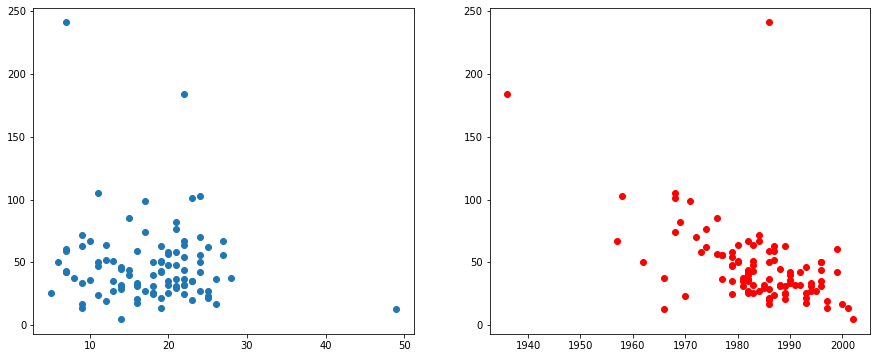

In [241]:
# 2.8.1
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax[0].scatter(x=frame["age_at_first_movie"], y=frame["credits"])
ax[1].scatter(x=frame["year_born"], y=frame["credits"],color = "red")
plt.show()

**Answer**: 

- For the first scatterplot, age at first movie vs credits, without any statistical diagnostics we can see somewhat positive linear relationship. We have two observations that are extreme on `y-axis` and one extreme on the `x-axis`. These outliers can influence any linear regression model we try to fit on this model.  

- For the second scatterplot, year born vs credits, we see a strong negative linear relationship. In this plot we have one observation that is extreme on both `x-axis` and `y-axis`, definitely an influential point. The other is also an outlier. These outliers can also skew the spread and influence, largely, any linear regression model we try to fit to this data.  

- The second plot can be observed to show that the older the performer, the possibility of having more credits because they may have had more time to accumulate this. 

- The observations on the first plot does not show a strong linear relationship between age at first movie and credits, however it can be greatly skewed by child actors we say that were 20 out of 100 performers.

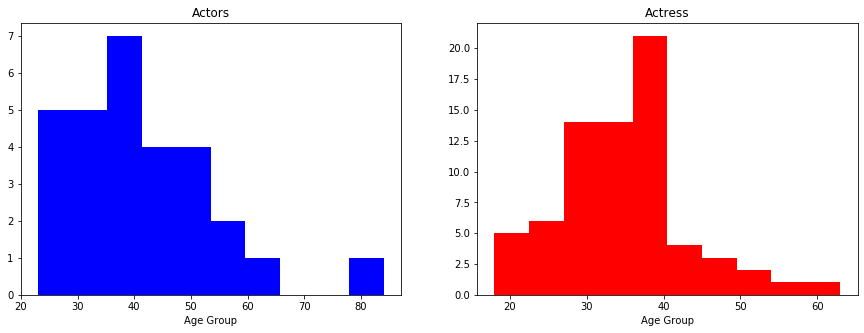

In [243]:
# 2.8.2
frame["age_current"] = 2020 - frame["year_born"]
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(frame[frame['gender']==0]['age_current'],  color='blue')
plt.xlabel('Age Group')
plt.title('Actors')

plt.subplot(1, 2, 2)
plt.hist(frame[frame['gender']==1]['age_current'],  color='red')
plt.xlabel('Age Group')
plt.title('Actress')
plt.show()

**Answer**:  

- Both the age distribution of actors and actresses are right skewed.  
- The actor's age distribution has a outlier of an actor that started their career really late.  
- The actress age distribution is a bit more normally distributed than actors however still has a long right tail.  
- There are more actresses than actors in the top 100 peformers for 2018 and their median age is between 35 - 40. The majority of actors seem to be between 23 and 52 year old, while actresses seem to be between 27 and 40 year old.

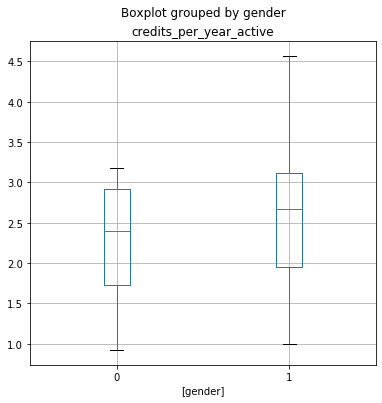

In [251]:
# 2.8.3
years_active = (2020 - frame["year_first_movie"])
frame["credits_per_year_active"] = frame["credits"] / years_active
frame[["gender", "credits_per_year_active"]].boxplot(by=['gender'], sym ='', figsize = [6, 6])

**Answer** 

- Yes, there seems to be a difference in the amount of credits per year active between actors and actresses. 

- On average, actresses seem to get more credits per year of active work than their actor colleagues.  

- The median for actresses also seem higher than actors as well.  


**2.9** [2 pts] Make a plot of the number of credits against the name of actor/actress. Who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2018? Define **most prolific** as the performer with the most credits. **

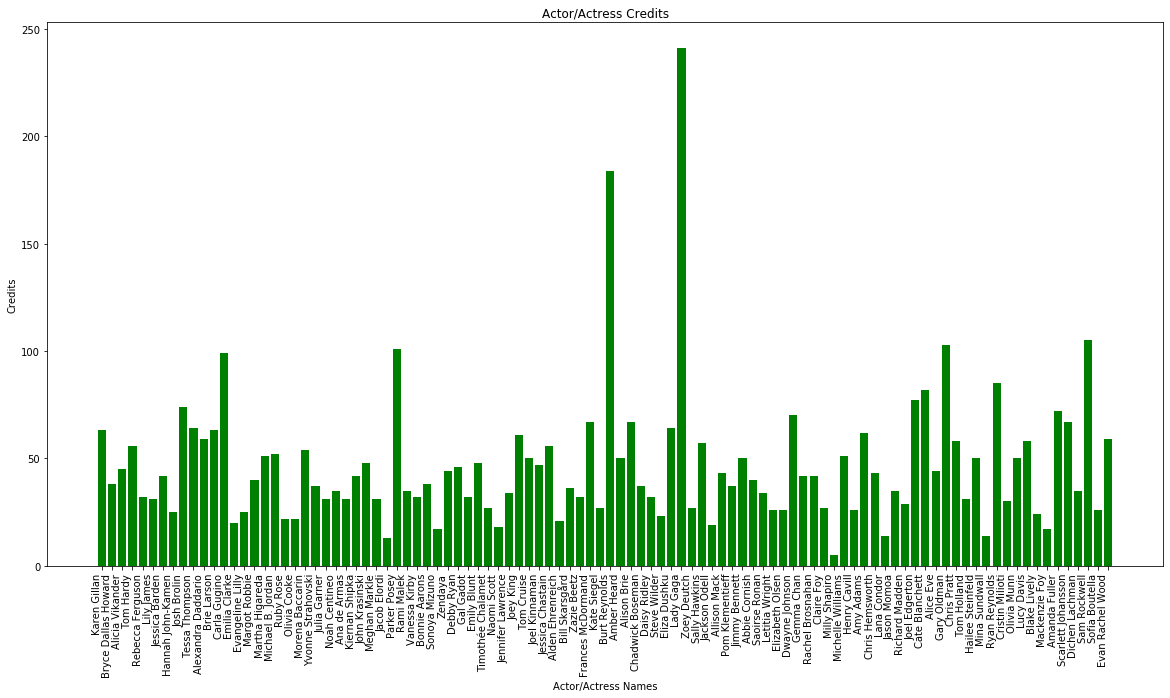

In [253]:
# your code here
plt.figure(figsize=(20, 10))
names = frame['name']
credits = frame['credits']
x = names
y = credits

x_pos = [idx for idx, _ in enumerate(x)]

plt.bar(x_pos, credits, color='green')

plt.ylabel('Credits')
plt.xlabel('Actor/Actress Names')
plt.title('Actor/Actress Credits')

plt.xticks(x_pos, x)
plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

**Answer**:  

We can see from the chart above that __Lady Gaga__ is the most prolific performer with the most credits. 

In [262]:
# Verifying the most prolific perform as seem from above chart  
most_prolific_performer = frame[frame.credits == frame.credits.max()]
most_prolific_performer

,name,gender,year_born,first_movie,year_first_movie,credits,age_at_first_movie,age_current,credits_per_year_active
57,Lady Gaga,0,1986,Quelli che... il calcio,1993,241,7,34,8.925926


**2.10 [2 pts]** In 4 or fewer sentences, comment on what you see in the plots above.  Are there any surprises or patterns?  Please **have some fun** with this question.

In [271]:
frame.nlargest(10,'credits')

,name,gender,year_born,first_movie,year_first_movie,credits,age_at_first_movie,age_current,credits_per_year_active
57,Lady Gaga,0,1986,Quelli che... il calcio,1993,241,7,34,8.925926
50,Burt Reynolds,0,1936,Flight,1958,184,22,84,2.967742
97,Sam Rockwell,0,1968,Joan Crawford's Children,1979,105,11,52,2.560976
83,Gary Oldman,0,1958,Remembrance,1982,103,24,62,2.710526
29,Parker Posey,1,1968,"First Love, Fatal Love",1991,101,23,52,3.482759
12,Carla Gugino,1,1971,Who's the Boss?,1988,99,17,49,3.093750
88,Ryan Reynolds,0,1976,Fifteen,1991,85,15,44,2.931034
81,Cate Blanchett,1,1969,Kaboria,1990,82,21,51,2.733333
80,Joel Edgerton,0,1974,Police Rescue,1995,77,21,46,3.080000
8,Josh Brolin,0,1968,The Goonies,1985,74,17,52,2.114286


In [272]:
# Lady Gaga data I scraped and validated
star_table[57]

{'name': 'Lady Gaga',
 'gender': 1,
 'year_born': 1986,
 'first_movie': 'Quelli che... il calcio',
 'year_first_movie': 1993,
 'credits': '241'}

**Answer**:  

- From above we can see that the The majority of the performers with top credit are actors and not actresses, expect for Lady Gaga. This may show a gender disparity.  

- Lady Gaga also is an outlier, in gaining credits, when compared to other actresses.   

- There are two outliers from the bar chart above, one which is Lady Gaga and the other Burt Reynolds.  

- The data provided by the TA is not correctly labeled for gender for an artist like Lady Gaga. You can see this from the code above.  
- Lady Gaga should have a gender designation of 1 and not 0.  

- As mentioned in 2.1 above, the successful scraping of data for analysis is largely dependent on the structure of the webpage.  Using just the first box of the performer does not always have "Actor" or "Actress". Lady Gaga had "Soundtrack". Digging deeper on their page shows that Actress is the gender designation.  

- This shows that data validation is really important for a successful data exploration.  
